In [ ]:
"""
MatSoc: Intro to ML Techniques
Assignment 2
Deadline: Wednesday, 3 January 2024, 23:59 IST

Name: Aditya Saraf
Roll Number: 210067
IITK Email: saditya21@iitk.ac.in

You may use the ML library of your choice to do this part.

1. Find the best fit degree of polynomial for the given data (use the data 1 link)
2. Predict the model for the given data (use data link 2)
3. Solve this competition (use logisitic regression): https://www.kaggle.com/t/6ac9ca8159f64c4eb794206a735a61ca

Use everything you have learned till date in part 3, its a competition!!!

  Note that the code for all parts must be visible

  Make sure all the code is run before you submit the notebook

  share a link to the notebook for problem 3 in this colab notebook if you use
  a different notebook for part 3.

"""

'\nMatSoc: Intro to ML Techniques\nAssignment 2\nDeadline: Wednesday, 3 January 2024, 23:59 IST\n\nName: Aditya Saraf\nRoll Number: 210067\nIITK Email: saditya21@iitk.ac.in\n\nYou may use the ML library of your choice to do this part.\n\n1. Find the best fit degree of polynomial for the given data (use the data 1 link)\n2. Predict the model for the given data (use data link 2)\n3. Solve this competition (use logisitic regression): https://www.kaggle.com/t/6ac9ca8159f64c4eb794206a735a61ca\n\nUse everything you have learned till date in part 3, its a competition!!!\n\n  Note that the code for all parts must be visible\n\n  Make sure all the code is run before you submit the notebook\n\n  share a link to the notebook for problem 3 in this colab notebook if you use\n  a different notebook for part 3.\n\n'

**1. Find the best fit degree of polynomial for the given data (use the data link)**

In [ ]:
!pip install gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
!gdown --id 1jgL3EuYudfHn3sCzJ3Wq0MIbJ8sdbsoL --output data.csv

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1jgL3EuYudfHn3sCzJ3Wq0MIbJ8sdbsoL
To: /content/data.csv
100% 14.4k/14.4k [00:00<00:00, 29.8MB/s]


In [ ]:
data = pd.read_csv('data.csv')

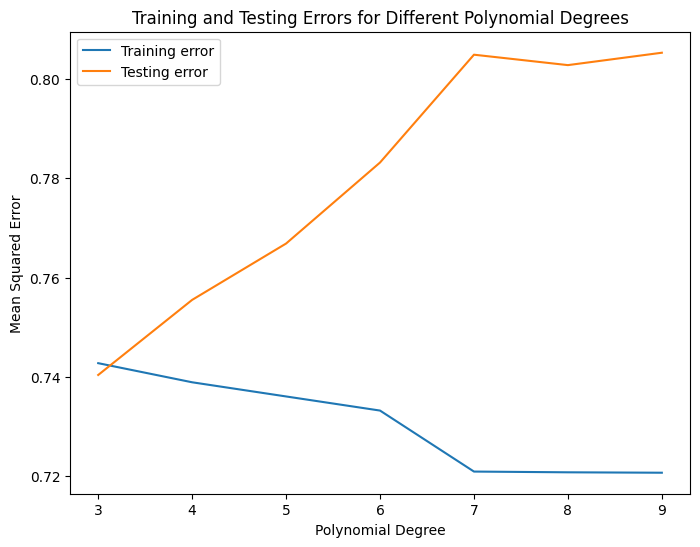

In [ ]:
# Assuming 'x' and 'y' are the columns in your DataFrame
X = data['x'].values.reshape(-1, 1)
y = data['y'].values

degrees = np.arange(3, 10)
train_errors, test_errors = [], []

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    train_errors.append(train_error)
    test_errors.append(test_error)

# Plotting the training and test errors for different degrees
plt.figure(figsize=(8, 6))
plt.plot(degrees, train_errors, label='Training error')
plt.plot(degrees, test_errors, label='Testing error')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Training and Testing Errors for Different Polynomial Degrees')
plt.legend()
plt.show()

**2. Predict the model for the given data (use data link 2)**

In [ ]:
!gdown --id 1CcgImgENeofOsWXnlnDfQevQj6UErs9M --output data1.csv

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1CcgImgENeofOsWXnlnDfQevQj6UErs9M
To: /content/data1.csv
100% 8.34k/8.34k [00:00<00:00, 20.3MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('data1.csv')

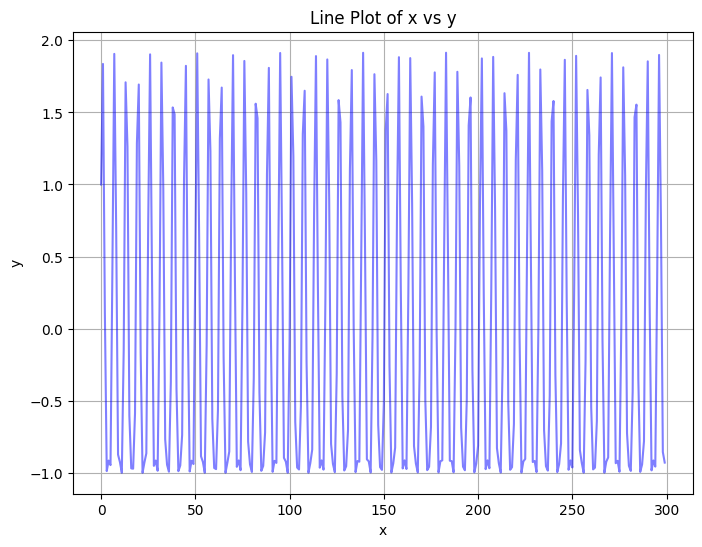

In [ ]:
x = df['x']
y = df['y']

plt.figure(figsize=(8, 6))
plt.plot(x, y, color='blue', alpha=0.5)
plt.title('Line Plot of x vs y')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

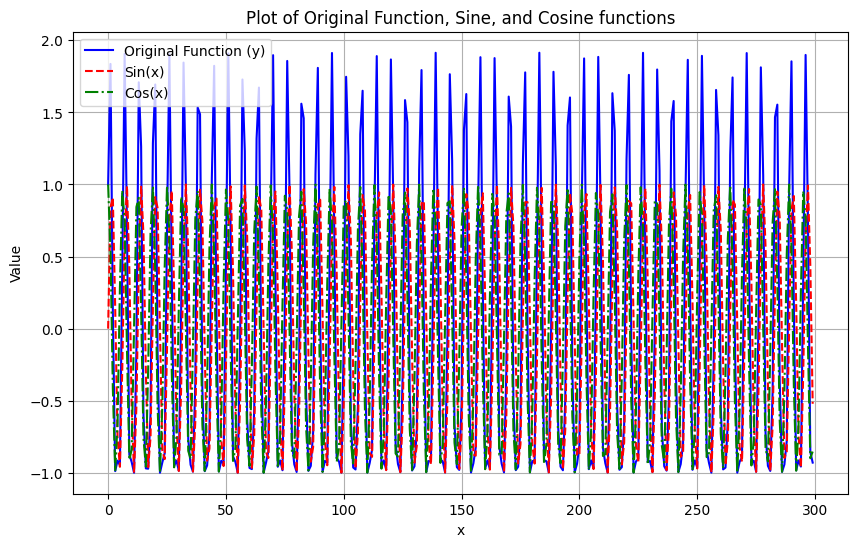

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Creating new features using sine and cosine functions
df['sin_x'] = np.sin(df['x'])
df['cos_x'] = np.cos(df['x'])
X_train, X_test, y_train, y_test = train_test_split(df[['x', 'sin_x', 'cos_x']], df['y'], test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

plt.figure(figsize=(10, 6))

plt.plot(df['x'], df['y'], label='Original Function (y)', linestyle='-', color='blue')

plt.plot(df['x'], df['sin_x'], label='Sin(x)', linestyle='--', color='red')

plt.plot(df['x'], df['cos_x'], label='Cos(x)', linestyle='-.', color='green')

plt.xlabel('x')
plt.ylabel('Value')
plt.title('Plot of Original Function, Sine, and Cosine functions')
plt.legend()
plt.grid(True)
plt.show()

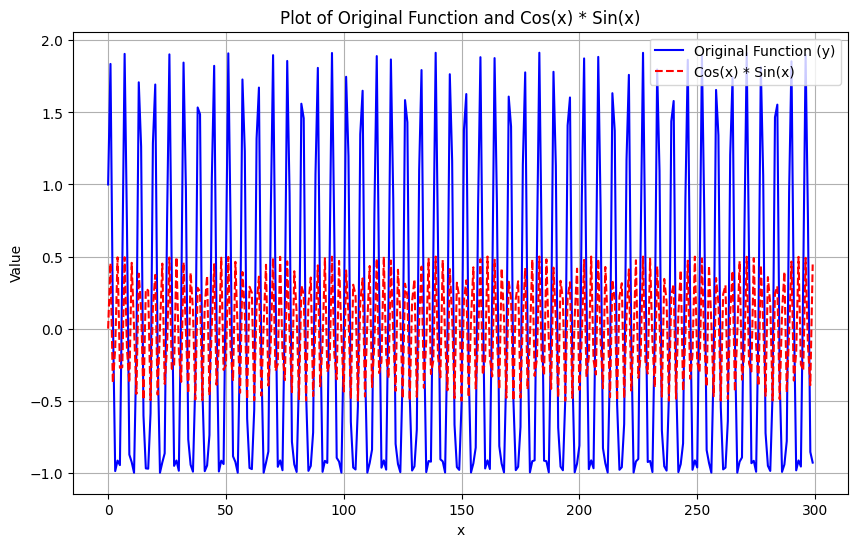

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Creating new feature using the product of sine and cosine functions
df['cos_x_times_sin_x'] = np.cos(df['x']) * np.sin(df['x'])
X_train, X_test, y_train, y_test = train_test_split(df[['x', 'cos_x_times_sin_x']], df['y'], test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

plt.figure(figsize=(10, 6))

plt.plot(df['x'], df['y'], label='Original Function (y)', linestyle='-', color='blue')

# Plotting the cos(x) * sin(x) function
plt.plot(df['x'], df['cos_x_times_sin_x'], label='Cos(x) * Sin(x)', linestyle='--', color='red')

plt.xlabel('x')
plt.ylabel('Value')
plt.title('Plot of Original Function and Cos(x) * Sin(x)')
plt.legend()
plt.grid(True)
plt.show()

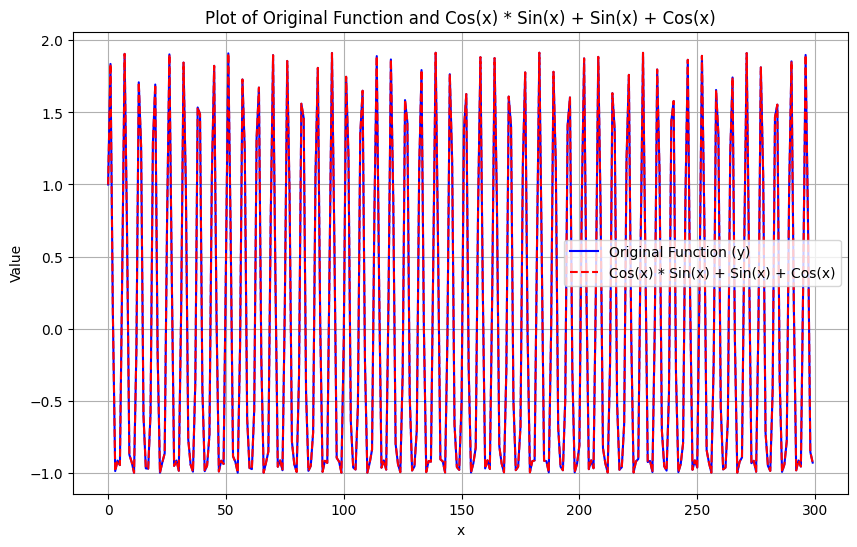

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Creating new feature using the combined function (cos(x) * sin(x) + sin(x) + cos(x))
df['combined_feature'] = np.cos(df['x']) * np.sin(df['x']) + np.sin(df['x']) + np.cos(df['x'])

X_train, X_test, y_train, y_test = train_test_split(df[['x', 'combined_feature']], df['y'], test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)
predictions = model.predict(X_test)

plt.figure(figsize=(10, 6))

plt.plot(df['x'], df['y'], label='Original Function (y)', linestyle='-', color='blue')

# Plotting the combined function (cos(x) * sin(x) + sin(x) + cos(x))
plt.plot(df['x'], df['combined_feature'], label='Cos(x) * Sin(x) + Sin(x) + Cos(x)', linestyle='--', color='red')

plt.xlabel('x')
plt.ylabel('Value')
plt.title('Plot of Original Function and Cos(x) * Sin(x) + Sin(x) + Cos(x)')
plt.legend()
plt.grid(True)
plt.show()

**3. Solve this competition (use logisitic regression): https://www.kaggle.com/t/6ac9ca8159f64c4eb794206a735a61ca**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
!pip install gdown

In [ ]:
import gdown
import pandas as pd

file_id = '1BAG_r0OWetB_y9_h-xD3UFOQ4j7UCNSx'

url_train = f'https://drive.google.com/uc?id={file_id}'

output_train = '/content/data.csv'

gdown.download(url_train, output_train, quiet=False)

train_data = pd.read_csv(output_train)

Downloading...
From: https://drive.google.com/uc?id=1BAG_r0OWetB_y9_h-xD3UFOQ4j7UCNSx
To: /content/data.csv
100%|██████████| 712k/712k [00:00<00:00, 87.1MB/s]


In [ ]:
url_test = 'https://drive.google.com/uc?id=1R5uXamh0FML6DZtvrHLcRe-mNPWhrp2K'
output_test = '/content/data.csv'

gdown.download(url_test, output_test, quiet=False)

test_data = pd.read_csv(output_test)

Downloading...
From: https://drive.google.com/uc?id=1R5uXamh0FML6DZtvrHLcRe-mNPWhrp2K
To: /content/data.csv
100%|██████████| 372k/372k [00:00<00:00, 78.1MB/s]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report

# Separate features and target variable
X = train_data.drop(columns=['Transported', 'Name'])  # Features
y = train_data['Transported']  # Target variable

X = X.fillna(0)
X = pd.get_dummies(X)

test_cols = pd.get_dummies(test_data.drop(columns='Name')).reindex(columns=X.columns, fill_value=0)
X_test = test_cols

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

imputer = SimpleImputer(strategy='mean')
X_test_imputed = imputer.fit_transform(X_test)
X_test_scaled = scaler.transform(X_test_imputed)

model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_val_scaled)

accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy}")

print("Classification Report:")
print(classification_report(y_val, y_pred))

test_predictions = model.predict(X_test_scaled)

submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Transported': test_predictions
})

submission.to_csv('logistic_regression_submission.csv', index=False)
print(submission.head())

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Validation Accuracy: 0.7285796434732605
Classification Report:
              precision    recall  f1-score   support

       False       0.70      0.79      0.74       861
        True       0.76      0.67      0.71       878

    accuracy                           0.73      1739
   macro avg       0.73      0.73      0.73      1739
weighted avg       0.73      0.73      0.73      1739

  PassengerId  Transported
0     0013_01         True
1     0018_01        False
2     0019_01         True
3     0021_01         True
4     0023_01        False
